In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
df = np.asarray(df)
df

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [355]:
x,y = np.shape(df)

In [356]:
np.random.seed(42)

In [357]:
np.random.shuffle(df)

In [358]:
df

array([[8, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [359]:
df = df.T
df.shape

(785, 42000)

In [360]:
X_test = df[:,:1000]
X_train = df[:,1000:]

In [361]:
X_test.shape

(785, 1000)

In [362]:
X_train.shape

(785, 41000)

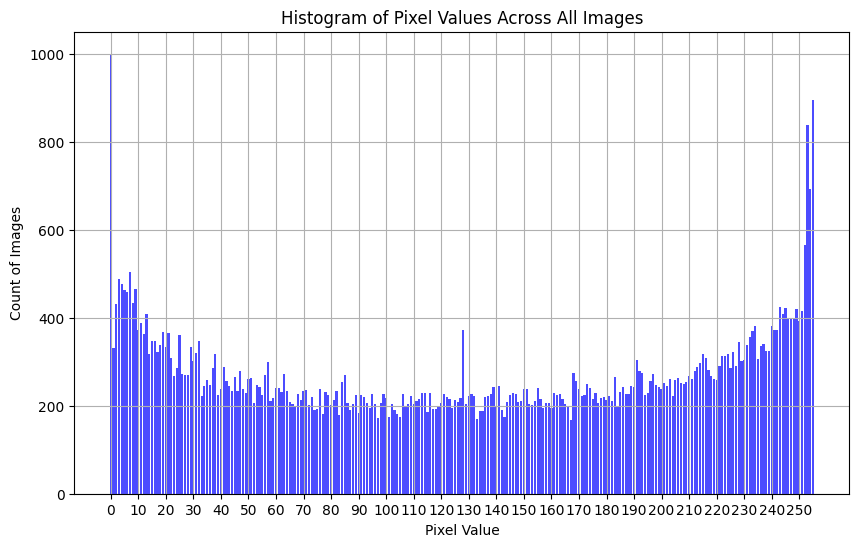

In [363]:
pixel_value_counts = {i: 0 for i in range(256)}


for i in range(X_test.shape[1]):
    unique_pixel_values = np.unique(X_train[:, i])
    for pixel_value in unique_pixel_values:
        pixel_value_counts[pixel_value] += 1

pixel_values = list(pixel_value_counts.keys())
counts = list(pixel_value_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pixel_values, counts, color='blue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Count of Images')
plt.title('Histogram of Pixel Values Across All Images')
plt.xticks(range(0, 256, 10)) 
plt.grid(True)
plt.show()

In [364]:
min(counts)

168

In [365]:
max(counts)

1000

In [366]:
X_test_normal = X_test[1:,:]/255
X_train_normal = X_train[1:,:]/255

In [367]:
X_test_normal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [368]:
y_test = X_test[0,:]
y_train = X_train[0,:]

In [369]:
y_test.shape

(1000,)

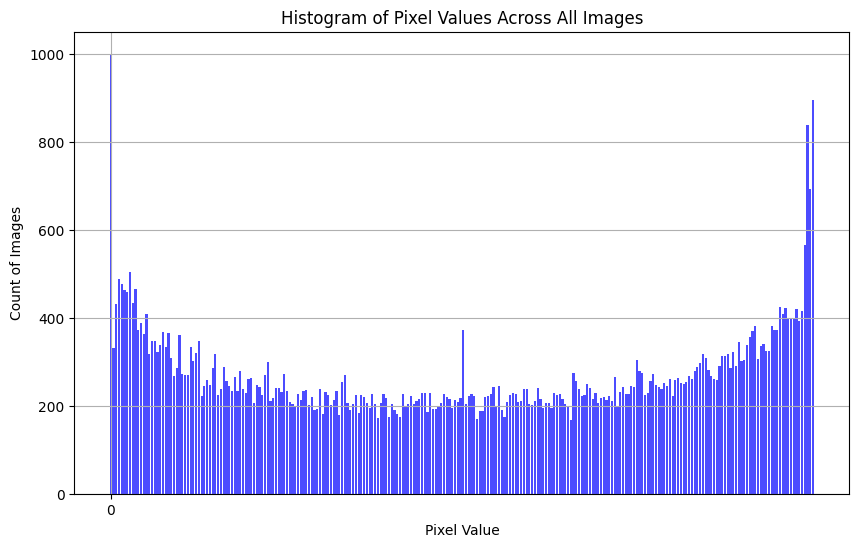

In [370]:
pixel_value_counts = {i: 0 for i in range(256)}

for i in range(X_test_normal.shape[1]):
    unique_pixel_values = np.unique(X_train[:, i])
    for pixel_value in unique_pixel_values:
        pixel_value_counts[pixel_value] += 1

pixel_values = list(pixel_value_counts.keys())
counts = list(pixel_value_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pixel_values, counts, color='blue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Count of Images')
plt.title('Histogram of Pixel Values Across All Images')
plt.xticks(range(0, 1, 10)) 
plt.grid(True)
plt.show()

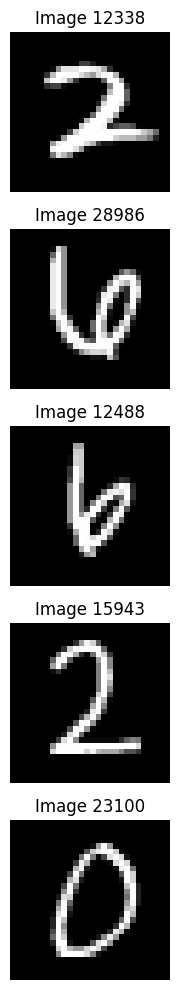

In [371]:
num_images_to_plot = 5
random_indices = np.random.choice(X_train_normal.shape[1], num_images_to_plot, replace=False)
plt.figure(figsize=(10, 2*num_images_to_plot))
for i, idx in enumerate(random_indices):
    plt.subplot(num_images_to_plot, 1, i+1)
    plt.imshow(X_train_normal[:, idx].reshape((28, 28)), cmap='gray')
    plt.title(f'Image {idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [372]:
def initialize_parameters():
    df = 1
    
    w1 = np.random.chisquare(df, (10,784))
    b1 = np.random.chisquare(df, (10, 1))
    w2 = np.random.chisquare(df, (10, 10))
    b2 = np.random.chisquare(df, (10, 1))

    def scale_to_range(x, new_min, new_max):
        old_min, old_max = np.min(x), np.max(x)
        return (x - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

    w1 = scale_to_range(w1, -0.5, 0.5)
    b1 = scale_to_range(b1, -0.5, 0.5)
    w2 = scale_to_range(w2, -0.5, 0.5)
    b2 = scale_to_range(b2, -0.5, 0.5)

    
    return w1, b1, w2, b2

In [373]:
W1, b1, W2, b2 = initialize_parameters()

In [374]:
print(W1)
print(b1)
print(W2)
print(b2)

[[-0.49994749 -0.48289463 -0.40141988 ... -0.48952718 -0.31561996
  -0.4714677 ]
 [-0.44429851 -0.48443992 -0.39631153 ... -0.3860048  -0.47683193
  -0.47262543]
 [-0.49465021 -0.4914851  -0.47777716 ... -0.4739674  -0.48755134
  -0.40092318]
 ...
 [-0.4943201  -0.49667184 -0.47036498 ... -0.44304125 -0.46967046
  -0.41577745]
 [-0.49106532 -0.36067068 -0.49916029 ... -0.4979053  -0.48613277
  -0.4386847 ]
 [-0.49316655 -0.49544884 -0.41042122 ... -0.30391849 -0.43421469
  -0.49220086]]
[[ 0.33805176]
 [ 0.5       ]
 [-0.43191036]
 [-0.31003983]
 [-0.38168337]
 [-0.41370453]
 [ 0.13577485]
 [ 0.49108584]
 [-0.48896875]
 [-0.5       ]]
[[-0.49545769 -0.43773621 -0.48646837 -0.49880673 -0.48660601 -0.32260425
  -0.49482037 -0.49382625 -0.26643576 -0.48268009]
 [-0.48140754 -0.35305199  0.10301838 -0.38188875  0.5        -0.49568922
  -0.46434773 -0.46555999  0.02065359 -0.47358587]
 [-0.35995947 -0.46407194 -0.43046819 -0.46068615 -0.19783692 -0.37647414
  -0.47681936 -0.47541709 -0.1599

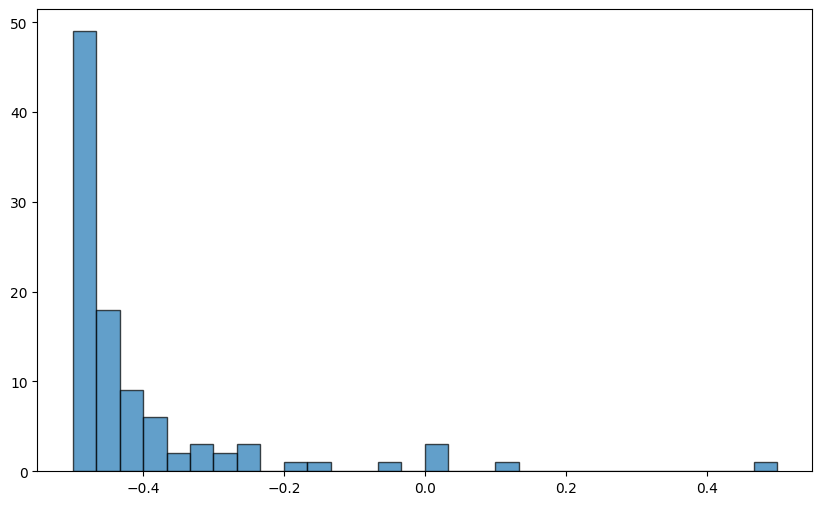

In [375]:
w2_flat = W2.flatten()

plt.figure(figsize = (10,6))
plt.hist(w2_flat, bins = 30, edgecolor='k', alpha=0.7)
plt.show()

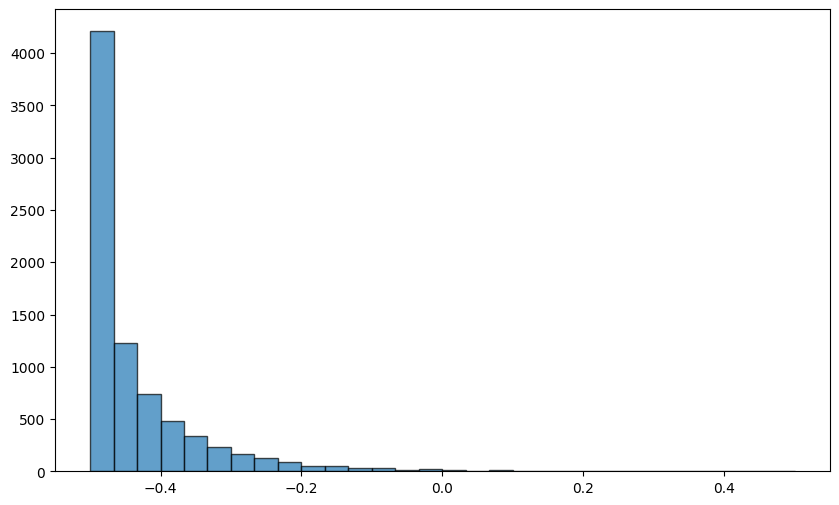

In [376]:
w1_flat = W1.flatten()

plt.figure(figsize = (10,6))
plt.hist(w1_flat, bins = 30, edgecolor='k', alpha=0.7)
plt.show()

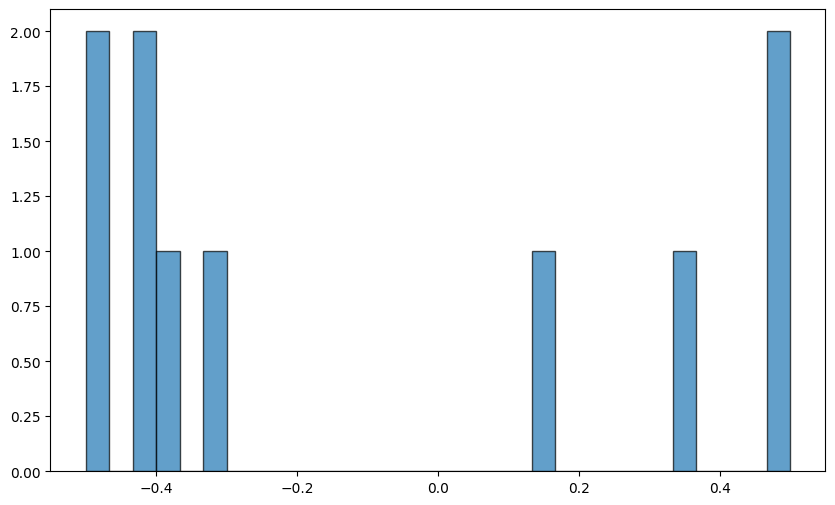

In [377]:
b1_flat = b1.flatten()

plt.figure(figsize = (10,6))
plt.hist(b1_flat, bins = 30, edgecolor='k', alpha=0.7)
plt.show()

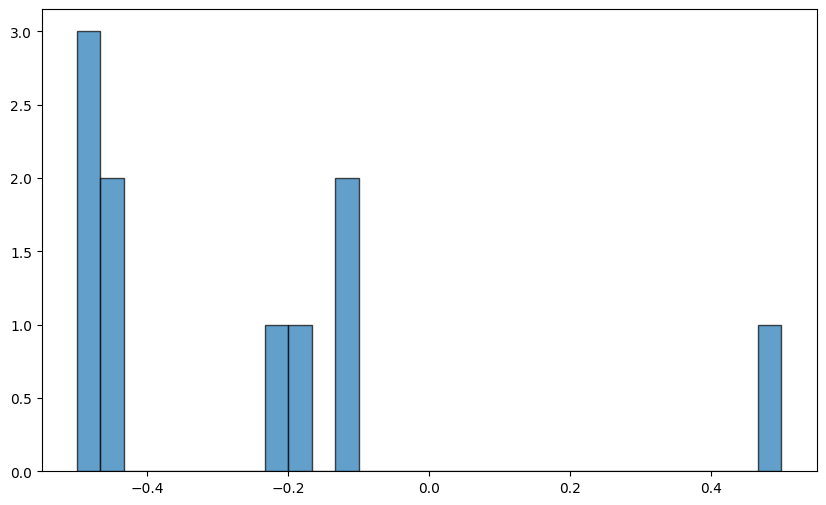

In [378]:
b2_flat = b2.flatten()

plt.figure(figsize = (10,6))
plt.hist(b2_flat, bins = 30, edgecolor='k', alpha=0.7)
plt.show()

In [379]:
def ReLU(X):
    return np.maximum(0, X)

def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
x = [1,2,-1,0,3]
y = ReLU(x)
print(y)

            

[1 2 0 0 3]


<function matplotlib.pyplot.show(close=None, block=None)>

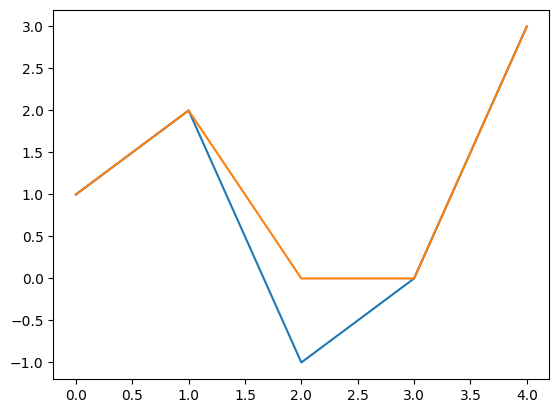

In [382]:
plt.plot(x)
plt.plot(y)
plt.show

In [381]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax([1,2,-1,.6,.5]))


[0.194914   0.52983118 0.02637874 0.13065476 0.11822132]
